In [30]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import csv

from dhdrnet.util import ROOT_DIR, DATA_DIR
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from dhdrnet.reconstruction import stats_for_dir
target_dir = DATA_DIR/"all_processed"
stats = stats_for_dir(target_dir,DATA_DIR/"merged")


ValueError: Could not load "" 
Reason: "image file is truncated (0 bytes not processed)"
Please see documentation at: http://pillow.readthedocs.io/en/latest/installation.html#external-libraries

In [28]:
1100 * 3636

3999600

In [19]:
stats_fromfile= []
with (target_dir/"fusion_records.csv").open("r") as f:
    reader = csv.DictReader(f) 
    for row in reader:
        stats_fromfile.append(row)
stats_fromfile
# (target_dir / "stats_max_exp[4-7].json").write_text(json.dumps(stats))

[{'name': '0127_20161018_111029_303',
  'mse_-3.5': '0.00010420983016956598',
  'ssim_-3.5': '0.9999992251396179',
  'ms_ssim_-3.5': '0.9999982714653015',
  'mse_3.5': '8.018439257284626e-05',
  'ssim_3.5': '0.9999995231628418',
  'ms_ssim_3.5': '0.9999988079071045',
  'mse_7.0': '7.989277219166979e-05',
  'ssim_7.0': '0.9999995231628418',
  'ms_ssim_7.0': '0.9999988079071045',
  'mse_-7.0': '7.983015530044213e-05',
  'ssim_-7.0': '0.9999995231628418',
  'ms_ssim_-7.0': '0.9999988079071045',
  'mse_4.0': '7.989336882019415e-05',
  'ssim_4.0': '0.9999995231628418',
  'ms_ssim_4.0': '0.9999988079071045',
  'mse_-4.0': '9.04067128431052e-05',
  'ssim_-4.0': '0.9999993443489075',
  'ms_ssim_-4.0': '0.9999985098838806',
  'mse_-2.0': '0.00012622900248970836',
  'ssim_-2.0': '0.9999988079071045',
  'ms_ssim_-2.0': '0.9999976754188538',
  'mse_2.0': '7.990586891537532e-05',
  'ssim_2.0': '0.9999995231628418',
  'ms_ssim_2.0': '0.9999988079071045',
  'mse_-3.0': '9.343849524157122e-05',
  'ssi

In [81]:
from itertools import islice
from dhdrnet.util import flatten
mses = {
    name: [
        {k:v['mse'] for k, v in ai.items()} for ai in a]
    for name,a in log.items()
}
mses_lists = []
exps = mses[list(mses.keys())[0]]
better_dict = dict()
for img_name, exp_mse in islice(mses.items(),100):
    items = [tuple(flatten([(k,v) for k,v in exp.items()])) for exp in exp_mse]
    td = dict()
    td.update(items)
    better_dict[img_name] = td
better_dict

{'0006_20160721_163256_525': {'-6.0': 0.00018550752429291606,
  '-3.0': 8.768711268203333e-06,
  '3.0': 13.705506324768066,
  '6.0': 1126.044677734375},
 '0006_20160721_170707_736': {'-6.0': 9.459667489863932e-05,
  '-3.0': 7.702627954131458e-06,
  '3.0': 12.35032844543457,
  '6.0': 1018.5750732421875},
 '0006_20160721_172953_515': {'-6.0': 0.0002835635677911341,
  '-3.0': 2.0119916371186264e-05,
  '3.0': 10.75147819519043,
  '6.0': 880.2195434570312},
 '0006_20160721_175239_909': {'-6.0': 0.0002032792690442875,
  '-3.0': 1.8297128917765804e-05,
  '3.0': 9.153768539428711,
  '6.0': 756.5973510742188},
 '0006_20160721_175246_335': {'-6.0': 0.00021833587379660457,
  '-3.0': 1.7206408301717602e-05,
  '3.0': 11.403974533081055,
  '6.0': 937.2907104492188},
 '0006_20160721_175907_041': {'-6.0': 0.00030676813912577927,
  '-3.0': 2.2647265723207965e-05,
  '3.0': 10.526446342468262,
  '6.0': 862.1648559570312},
 '0006_20160721_181503_256': {'-6.0': 0.0002863875706680119,
  '-3.0': 2.0896815840

In [82]:
from collections import defaultdict
all_mses = defaultdict(list)
for img_name, vals in better_dict.items():
    for ev, mse in vals.items():
        all_mses[ev].append(mse)

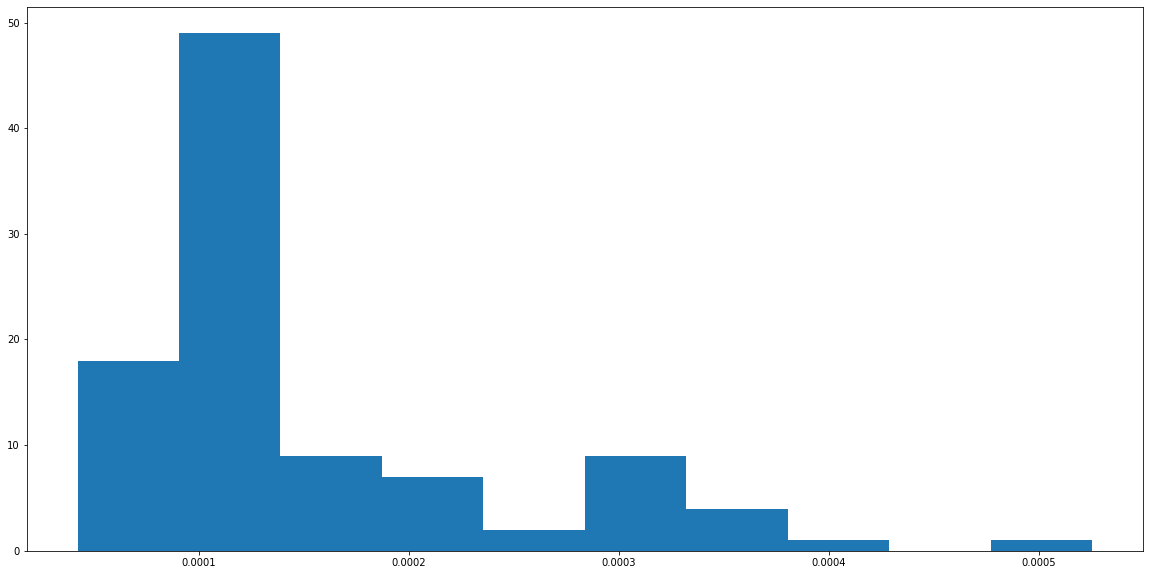

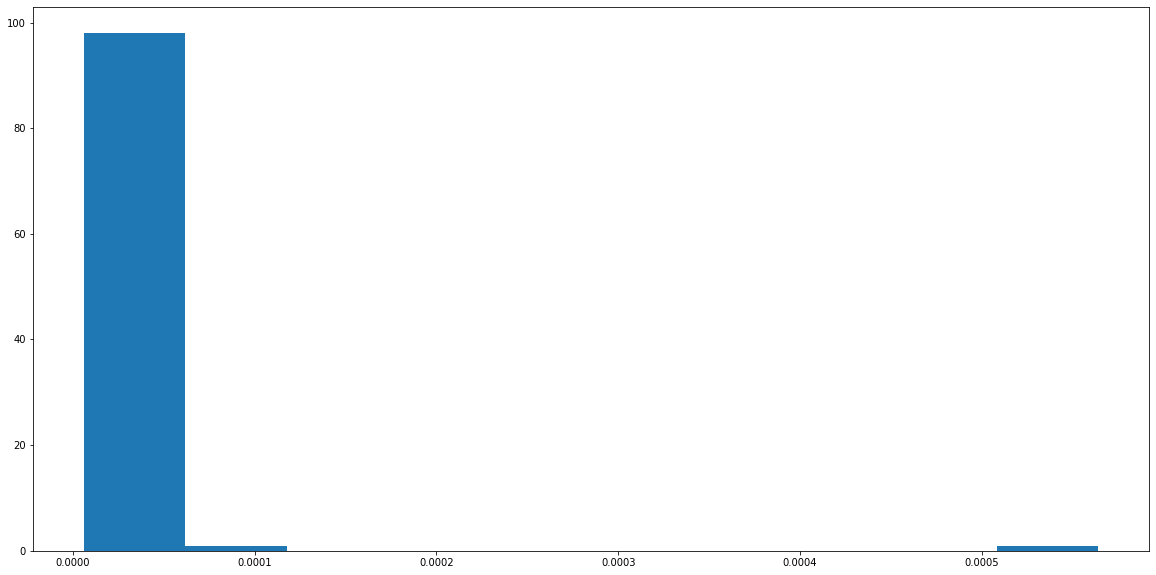

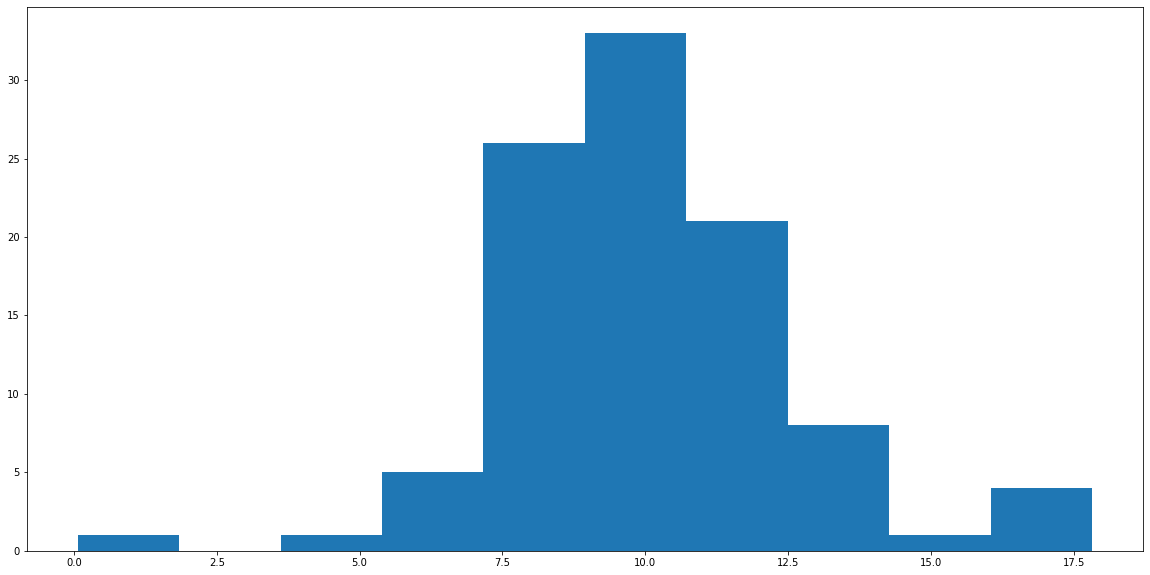

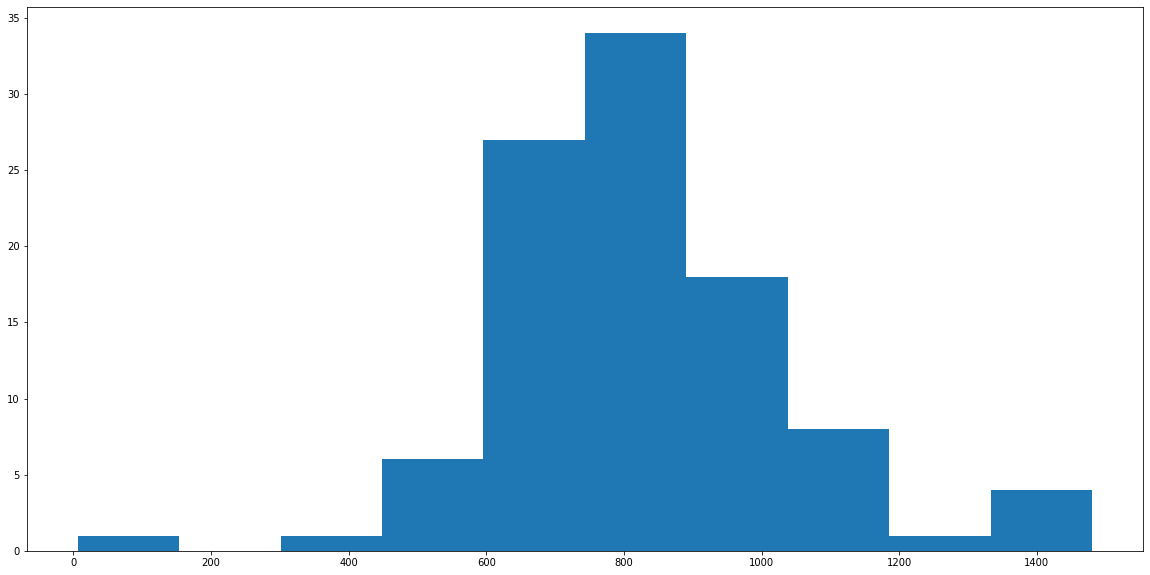

In [83]:
for ev, mse in all_mses.items():
    plt.figure()
    plt.hist(all_mses[ev])